In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

### Постановка задачи

Дана выборка размером 290 человек с наблюдениями про IQ и пол. Нужно посчитать основные меры разброса, проверить данные на нормальность и, если данные распределены нормально, сравнить среднее значение IQ для каждого пола  

Мы предполагаем, что IQ не отличается от пола, нужно проверить, так ли это

### Используемые стат.тесты:   
- тест Шапиро-Уилка для проверки на соответствие нормальному распределению 
- тест Левене для проверки гомогенности дисперсий
- Т-тест для сравнения средних

Для каждого теста в соответствующей части приведено описание нулевой и альтернативной гипотезы (H0 и H1), а также критерий сравнения `pvalue` с `alpha` и интерпретация

### Общий пайплайн: 
- Получение данных, проверка на пропуски
- Описательные статистики (меры центра и меры размаха)
- Визуализация
- Стат.тесты

In [2]:
df = pd.read_csv('~/Documents/M/pets/data/N290.csv', sep=';')

In [3]:
df.head()

,IQ,Sex
0,100,1
1,115,1
2,128,1
3,111,1
4,99,1


In [4]:
df.shape

(290, 2)

In [5]:
df.dtypes

IQ     int64
Sex    int64
dtype: object

In [6]:
df.IQ.unique()

array([100, 115, 128, 111,  99, 119, 104, 109,  98,  94, 120, 114, 112,
       102, 125, 116,  92, 107,  89, 124,  79,  97,  90,  83,  87, 126,
        88, 127, 117,  85, 106, 123, 101, 105, 113, 130, 108, 121, 122,
       103, 118,  62, 110,  84, 134,  95, 131, 133, 138,  91, 143,  93,
       137, 140,  96, 132, 129, 148, 136])

In [7]:
df.Sex.unique()

array([1, 2])

In [8]:
df.isna().sum()

IQ     0
Sex    0
dtype: int64

Данные без пропусков, включают в себя 290 записей с уровнем IQ и полом (1, 2).  

### Меры центра: 
Рассчитаем для данного набора данных:
- моду
- медиану
- мат.ожидание

In [9]:
df.IQ.mode()

0    111
1    119
Name: IQ, dtype: int64

In [10]:
df.IQ.median()

112.0

In [11]:
df.IQ.mean()

111.58275862068966

### Меры размаха:
- дисперсия
- стандартное отклонение
- размах

In [12]:
np.percentile(df.IQ, [0, 100])

array([ 62., 148.])

In [13]:
df.IQ.var()

158.60385395537529

In [14]:
df.IQ.std()

12.593802204075436

In [15]:
df.describe()

,IQ,Sex
count,290.000000,290.000000
mean,111.582759,1.462069
std,12.593802,0.499421
min,62.000000,1.000000
25%,104.000000,1.000000
50%,112.000000,1.000000
75%,120.000000,2.000000
max,148.000000,2.000000


<Axes: xlabel='IQ', ylabel='Count'>

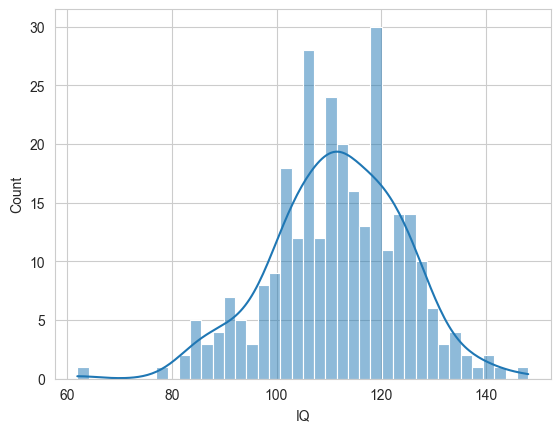

In [16]:
sns.histplot(df.IQ, bins=40, kde=True)

<Axes: xlabel='IQ'>

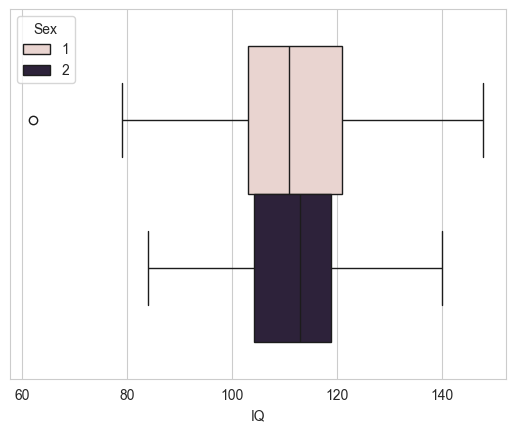

In [17]:
sns.boxplot(data=df, x=df.IQ, hue=df.Sex)

In [18]:
df.IQ.sort_values(ascending=False)

227    148
137    143
170    140
215    140
127    138
      ... 
112     84
24      83
95      83
21      79
96      62
Name: IQ, Length: 290, dtype: int64

### Проведение стат.тестов
alpha = 0.05

In [19]:
alpha = 0.05

In [20]:
df_sex1 = df.query('Sex == 1')
df_sex2 = df.query('Sex == 2')

### Тест Шапиро-Уилка  
**Нулевая гипотеза (H0)**: Данные распределены нормально  
**Альтернативная гипотеза (H1)**: Данные распределены не нормально  

**Критерий:**    
Если `p-value < 0.05`, отклоняем H0 и заключаем, что данные не подчиняются нормальному распределению  
Если `p-value >= 0.05`, не отклоняем H0 и заключаем, что данные распределены нормально


In [32]:
statistic, pvalue = stats.shapiro(df_sex1.IQ)
print(f"Shapiro-Wilk Test for group Sex == 1: Statistic={statistic}, p-value={pvalue}")
print(f"Is normal: {pvalue >= alpha}")

Shapiro-Wilk Test for group Sex == 1: Statistic=0.9879131857965562, p-value=0.19735266553507252
Is normal: True


In [33]:
statistic, pvalue = stats.shapiro(df_sex2.IQ)
print(f"Shapiro-Wilk Test for group Sex == 2: Statistic={statistic}, p-value={pvalue}")
print(f"Is normal: {pvalue >= alpha}")

Shapiro-Wilk Test for group Sex == 2: Statistic=0.9829221687650157, p-value=0.09169347343596775
Is normal: True


In [34]:
statistic, pvalue = stats.shapiro(df.IQ)
print(f"Shapiro-Wilk Test for overall IQ: Statistic={statistic}, p-value={pvalue}")
print(f"Is normal: {pvalue >= alpha}")

Shapiro-Wilk Test for overall IQ: Statistic=0.9921895324841058, p-value=0.13071825014956623
Is normal: True


Text(0.5, 1.0, 'Distribution of IQ by Sex')

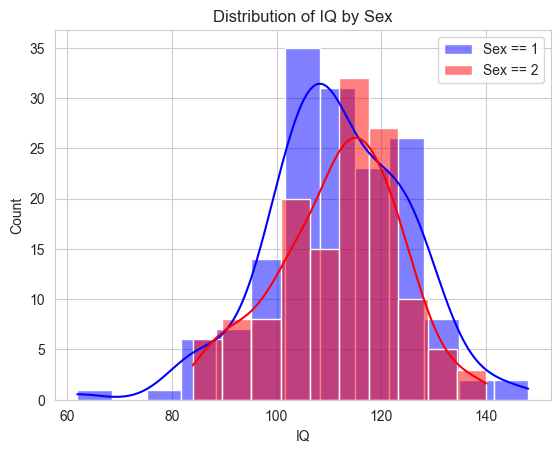

In [40]:
sns.histplot(df_sex1['IQ'], kde=True, label='Sex == 1', color='blue')
sns.histplot(df_sex2['IQ'], kde=True, label='Sex == 2', color='red')
plt.legend()
plt.title("Distribution of IQ by Sex")

Text(0.5, 1.0, 'Q-Q Plot for group Sex == 1')

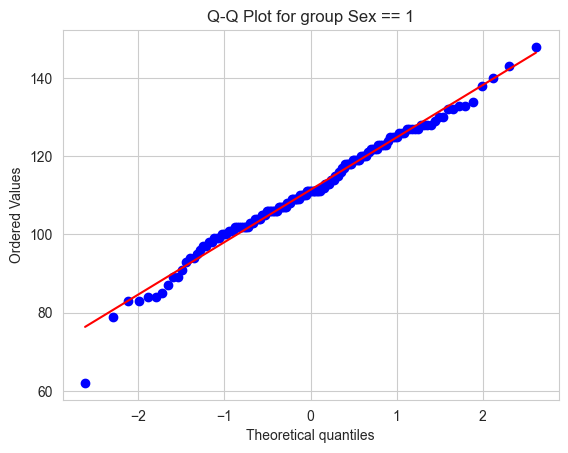

In [43]:
stats.probplot(df_sex1.IQ, dist="norm", plot=plt)
plt.title("Q-Q Plot for group Sex == 1")

Text(0.5, 1.0, 'Q-Q Plot for group Sex == 2')

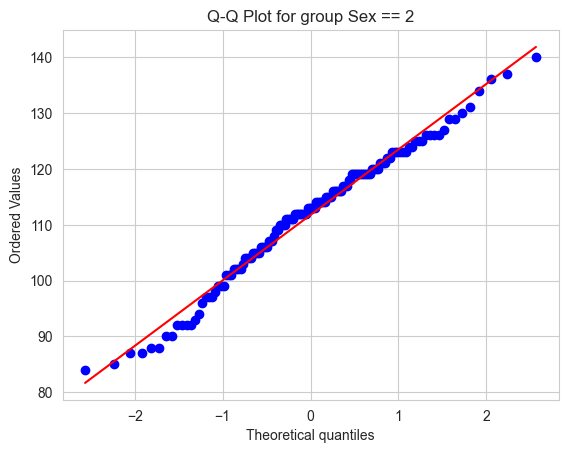

In [44]:
stats.probplot(df_sex2.IQ, dist="norm", plot=plt)
plt.title("Q-Q Plot for group Sex == 2")

### Тест Левене:   
**Нулевая гипотеза (H0)**: Дисперсии в группах равны (дисперсии гомогенны)  
**Альтернативная гипотеза (H1)**: Дисперсии в группах не равны  

**Критерий:**    
Если `p-value < 0.05`, отклоняем H0 и заключаем, что дисперсии не равны  
Если `p-value >= 0.05`, не отклоняем H0 и заключаем, что дисперсии равны

In [45]:
statistic, pvalue = stats.levene(df_sex1.IQ, df_sex2.IQ)
print(f"Levene's Test for equal variances: Statistic={statistic}, p-value={pvalue}")
print(f"Equal variances: {pvalue >= alpha}")

Levene's Test for equal variances: Statistic=1.6197091183643144, p-value=0.20415881281006729
Equal variances: True


### T-test  
**Нулевая гипотеза H0**: средние значения в двух группах равны   
**Альтернативая гипотеза H1**: средние значения в двух группах не равны  

**Критерий:**    
Если `p-value < 0.05`, отклоняем H0 и заключаем, что средние значения в группах значимо различаются  
Если `p-value >= 0.05`, не отклоняем H0 и заключаем, что средние значения в группах не имеют значимых различий  


In [46]:
statistic, pvalue = stats.ttest_ind(df_sex1.IQ, df_sex2.IQ)
print(f"T-test: Statistic={statistic}, p-value={pvalue}")
print(f"Mean equality: {pvalue >= alpha}")

T-test: Statistic=-0.21391482325494063, p-value=0.8307648464024591
Mean equality: True


In [47]:
mean_sex1 = df_sex1.IQ.mean()
mean_sex2 = df_sex2.IQ.mean()
print(f"Mean IQ for Sex == 1: {mean_sex1}")
print(f"Mean IQ for Sex == 2: {mean_sex2}")

Mean IQ for Sex == 1: 111.43589743589743
Mean IQ for Sex == 2: 111.75373134328358


### Выводы

- Тест Шапиро-Уилка позволяет заключить, что данные в обеих группах распределены нормально. Тест Левене говорит, что дисперсии гомогенны. Значит мы можем использовать параметрические тесты (например, T-test)
- Результаты T-теста позволяют заключить, что средний показатель IQ в данном исследовании одинаков для обоих полов. Мы не можем сделать значимых различий между уровнем IQ в разных группах